In [2]:
import jax
from jax import numpy as jp
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import brax

In [3]:
from brax.io import mjcf

ball = mjcf.loads(
    """<mujoco>
         <option timestep="0.005"/>
         <worldbody>
           <body pos="0 0 3">
             <joint type="free"/>
             <geom size="0.5" type="sphere"/>
           </body>
           <geom size="40 40 40" type="plane"/>
         </worldbody>
       </mujoco>
  """)

c:\Users\makis\AppData\Local\Programs\Python\Python313\Lib\site-packages\brax\io\mjcf.py:480: UserWarning: Brax System, piplines and environments are not actively being maintained. Please see MJX for a well maintained JAX-based physics engine: https://github.com/google-deepmind/mujoco/tree/main/mjx. For a host of environments that use MJX, see: https://github.com/google-deepmind/mujoco_playground.
  warnings.warn(


In [4]:
print(ball.link.inertia.mass, 4/3 * jp.pi * 0.5**3 * 1000)

[523.59875] 523.5987755982989


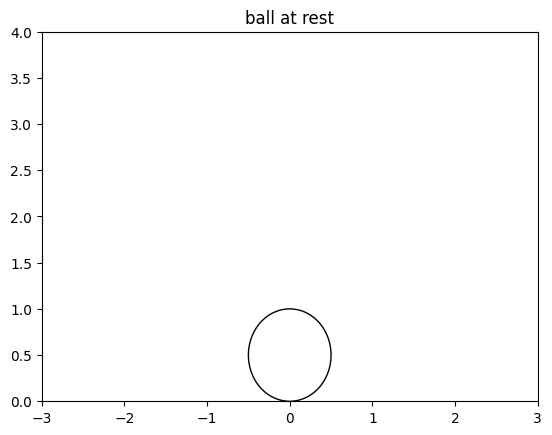

In [5]:
def visualize(ax, pos, alpha=1):
  for p, pn in zip(pos, list(pos[1:]) + [None]):
    ax.add_patch(Circle(xy=(p[0], p[2]), radius=0.5, fill=False, color=(0, 0, 0, alpha)))
    if pn is not None:
      ax.add_line(Line2D([p[0], pn[0]], [p[2], pn[2]], color=(1, 0, 0, alpha)))

_, ax = plt.subplots()
plt.xlim([-3, 3])
plt.ylim([0, 4])

visualize(ax, [[0, 0, 0.5]])
plt.title('ball at rest')
plt.show()

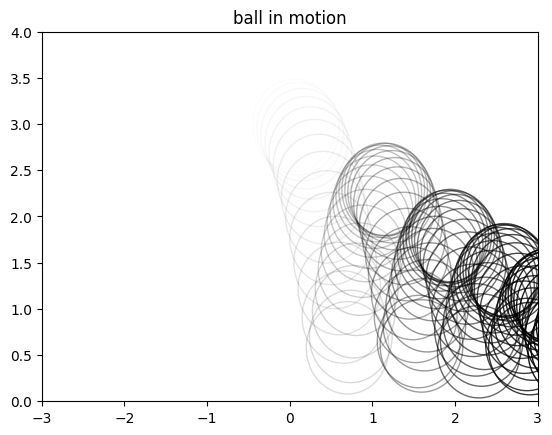

In [12]:
#@title { run: "auto"}
from brax.positional import pipeline

elasticity = 0.85
ball_velocity = 1

# change the material elasticity of the ball and the plane
ball = ball.replace(elasticity=jp.array([elasticity] * ball.ngeom))

# provide an initial velocity to the ball
qd = jp.array([ball_velocity, 0, 0, 0, 0, 5])
state = jax.jit(pipeline.init)(ball, ball.init_q, qd)

_, ax = plt.subplots()
plt.xlim([-3, 3])
plt.ylim([0, 4])

for i in range(1000):
  if i % 10 == 0:
    visualize(ax, state.x.pos, i / 1000.)
  state = jax.jit(pipeline.step)(ball, state, None)

plt.title('ball in motion')
plt.show()